This notebook is for creating typical strain transients for an AF and nonAF heart failure case. 

Creating transients for:

    * Global parallel fibre strain on:
        * [X]endo
        * [X]epi
    * Most significant regional parallel fibre strains:
        * Anterior Wall endocardium (p=0.009) 
        * Anterior Wall epicardium (p=0.005)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
numTimes = 10

nTime=np.arange(0, numTimes)/numTimes

DataPath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

f20_cases = ['21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34']
f20_cases = [f'CT-CRT-{case_ind}' for case_ind in f20_cases]
ebr=['EBR-01', 'EBR-02']
f20_cases = f20_cases + ebr

In [12]:
def retrieve_fibres_data(case, fibre_arch, component, region):
    """
    Use this function to retrieve global fibre meanstrains transients
    Usage:
        * fibre_arch: endo_avg, epi_avg
        * component: 0 (along fibres), 1 (across fibres), 2 (normal)
        * region: global, ant, lat, post, roof, sept
    """
    
    if case in f20_cases:
        filepath=f'{DataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9'
    
    else:
        filepath=f'{DataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9'
        
    data = np.loadtxt(f'{filepath}/{fibre_arch}_excl_PVs_percent_meanstrains_{region}.txt')[component]
    
    return data

In [13]:
## All 30 Cases

ebr = ['EBR-01', 'EBR-02']

# nonAF
nonaf_cases = ['01', '02', '05', '06', '07', '08', '09', '12', '14',
             '15', '16', '17', '18', '24', '27', '28', '29', '30',
             '32']
nonaf_cases = [f"CT-CRT-{case}" for case in nonaf_cases]


# AF
af_cases = ['10', '19', '20', '23', '26', '31', '25', '34']
af_cases = [f'CT-CRT-{case}' for case in af_cases]
af_cases = af_cases + ebr

## Global f1 strains

In [47]:
## Construct matrix to hold all 19 nonAF cases' mean strains
global_nAF = np.zeros((19, 10))

arch='endo_avg'

for i in range(0,19):
    case=nonaf_cases[i] ## fill in with case list using index i
    
    global_nAF[i,:] = retrieve_fibres_data(case, arch, 0, 'global')

In [59]:
## Construct matrix to hold all 19 nonAF cases' mean strains
global_AF = np.zeros((10, 10))

arch='epi_avg'

for i in range(0,10):
    case=af_cases[i] ## fill in with case list using index i
    
    global_AF[i,:] = retrieve_fibres_data(case, arch, 0, 'global')

## nAF

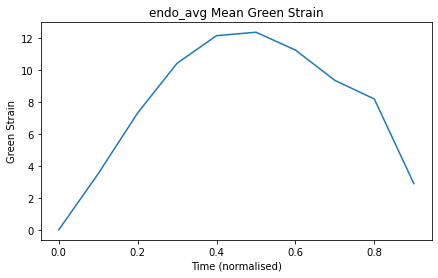

In [49]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

plt.plot(nTime, global_nAF.mean(axis=0))
plt.ylabel("Green Strain")
plt.xlabel("Time (normalised)")
plt.title(f"{arch} Mean Green Strain")

# plt.savefig(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/global/green_strain/{arch}_nAF_mean.png", 
#             bbox_inches='tight', dpi=200, facecolor=fig.get_facecolor())

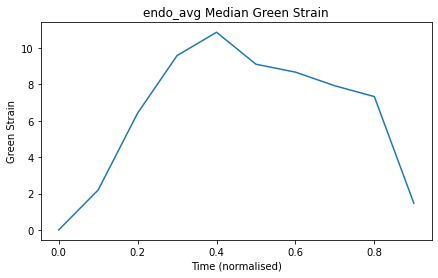

In [50]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

plt.plot(nTime, np.median(global_nAF, axis=0))
plt.ylabel("Green Strain")
plt.xlabel("Time (normalised)")
plt.title(f"{arch} Median Green Strain")

# plt.savefig(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/global/green_strain/{arch}_nAF_median.png", 
#             bbox_inches='tight', dpi=200, facecolor=fig.get_facecolor())

## AF

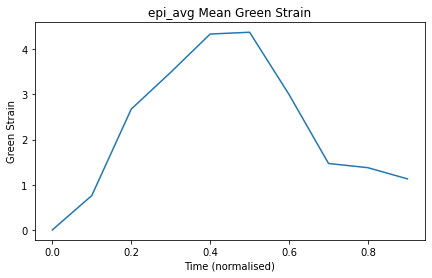

In [61]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

plt.plot(nTime, global_AF.mean(axis=0))
plt.ylabel("Green Strain")
plt.xlabel("Time (normalised)")
plt.title(f"{arch} Mean Green Strain")

# plt.savefig(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/global/green_strain/{arch}_AF_mean.png", 
#             bbox_inches='tight', dpi=200, facecolor=fig.get_facecolor())

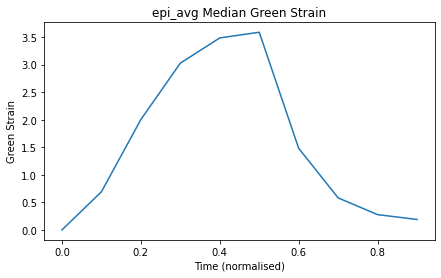

In [63]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

plt.plot(nTime, np.median(global_AF, axis=0))
plt.ylabel("Green Strain")
plt.xlabel("Time (normalised)")
plt.title(f"{arch} Median Green Strain")

# plt.savefig(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/global/green_strain/{arch}_AF_median.png", 
#             bbox_inches='tight', dpi=200, facecolor=fig.get_facecolor())

In [64]:
# np.savetxt(f'/home/csi20/Dropbox/phd/Documents/Stuart_analysis/global/green_strain/{arch}_AF_mean.txt', global_AF.mean(axis=0))

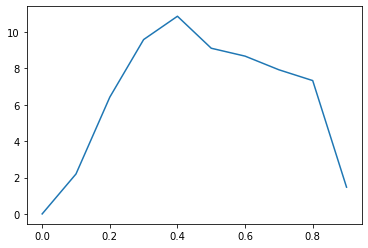

In [26]:
plt.plot(nTime, np.median(global_nAF, axis=0))

In [65]:
# np.savetxt(f'/home/csi20/Dropbox/phd/Documents/Stuart_analysis/global/green_strain/{arch}_AF_median.txt', np.median(global_AF, axis=0))

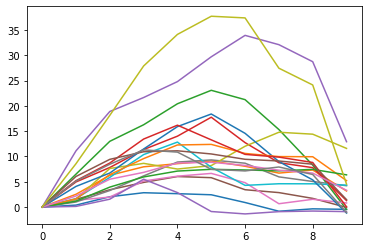

In [17]:
for i in range(0,19):
    plt.plot(global_nAF[i,:])

## Regional f1 strains

## nAF

In [93]:
## Construct matrix to hold all 19 nonAF cases' mean strains
regional_nAF = np.zeros((19, 10))

arch='endo_avg'
region='ant'

for i in range(0,19):
    case=nonaf_cases[i] ## fill in with case list using index i
    
    regional_nAF[i,:] = retrieve_fibres_data(case, arch, 0, region)

Text(0.5, 1.0, 'endo_avg ant Mean Green Strain')

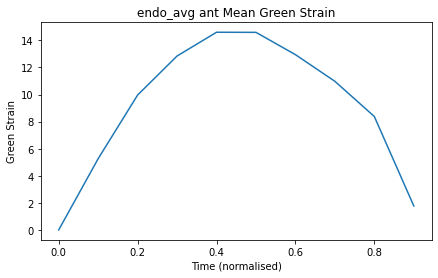

In [94]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

plt.plot(nTime, regional_nAF.mean(axis=0))
plt.ylabel("Green Strain")
plt.xlabel("Time (normalised)")
plt.title(f"{arch} {region} Mean Green Strain")

# plt.savefig(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/regional/green_strain/nAF/{arch}_{region}_nAF_mean.png", 
#             bbox_inches='tight', dpi=200, facecolor=fig.get_facecolor())

Text(0.5, 1.0, 'endo_avg ant Median Green Strain')

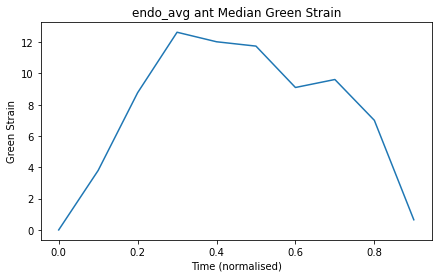

In [95]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

plt.plot(nTime, np.median(regional_nAF, axis=0))
plt.ylabel("Green Strain")
plt.xlabel("Time (normalised)")
plt.title(f"{arch} {region} Median Green Strain")

# plt.savefig(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/regional/green_strain/nAF/{arch}_{region}_nAF_median.png", 
#             bbox_inches='tight', dpi=200, facecolor=fig.get_facecolor())

In [96]:
np.savetxt(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/regional/green_strain/nAF/{arch}_{region}_nAF_mean.txt",
          regional_nAF.mean(axis=0))

In [97]:
np.savetxt(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/regional/green_strain/nAF/{arch}_{region}_nAF_median.txt",
          np.median(regional_nAF, axis=0))

## AF

In [88]:
## Construct matrix to hold all 19 nonAF cases' mean strains
regional_AF = np.zeros((10, 10))

arch='endo_avg'
region='ant'

for i in range(0,10):
    case=af_cases[i] ## fill in with case list using index i
    
    regional_AF[i,:] = retrieve_fibres_data(case, arch, 0, region)

Text(0.5, 1.0, 'endo_avg ant Mean Green Strain')

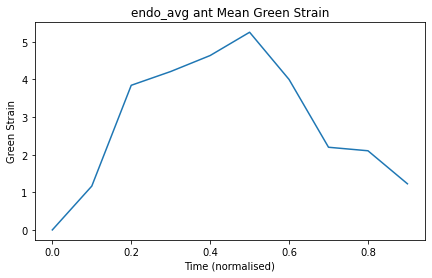

In [89]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

plt.plot(nTime, regional_AF.mean(axis=0))
plt.ylabel("Green Strain")
plt.xlabel("Time (normalised)")
plt.title(f"{arch} {region} Mean Green Strain")

# plt.savefig(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/regional/green_strain/AF/{arch}_{region}_AF_mean.png", 
#             bbox_inches='tight', dpi=200, facecolor=fig.get_facecolor())

Text(0.5, 1.0, 'endo_avg ant Median Green Strain')

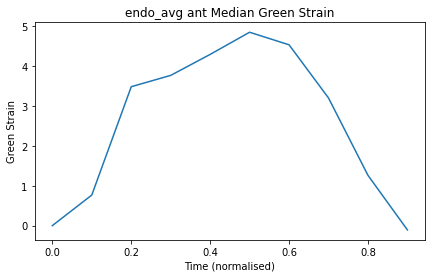

In [90]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

plt.plot(nTime, np.median(regional_AF, axis=0))
plt.ylabel("Green Strain")
plt.xlabel("Time (normalised)")
plt.title(f"{arch} {region} Median Green Strain")

# plt.savefig(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/regional/green_strain/AF/{arch}_{region}_AF_median.png", 
#             bbox_inches='tight', dpi=200, facecolor=fig.get_facecolor())

In [91]:
np.savetxt(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/regional/green_strain/AF/{arch}_{region}_AF_mean.txt",
          regional_AF.mean(axis=0))

In [92]:
np.savetxt(f"/home/csi20/Dropbox/phd/Documents/Stuart_analysis/regional/green_strain/AF/{arch}_{region}_AF_median.txt",
          np.median(regional_AF, axis=0))